In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import os
from pathlib import Path
import pandas as pd
from dotenv import load_dotenv

In [4]:
load_dotenv()

True

In [ ]:
save_path = os.environ.get("SAVE_PATH")
BASE_LOAD_PATH = Path.home() / save_path
wp_st = pd.read_csv(BASE_LOAD_PATH / "serving_time_wp.csv", index=False)
sq_st = pd.read_csv(BASE_LOAD_PATH / "serving_time_sq.csv", index=False)

In [43]:

# Define x-axis values
x = [300, 500, 1000, 2000, 5000]
num_candidates = [c for _ in range(4) for c in x]

# Define y-axis values
wa_5 = [0.004210, 0.006127, 0.011299, 0.042985, 0.093208]
wa_10 = [0.007421, 0.011449, 0.023207, 0.086088, 0.180334]
wa_20 = [0.013384, 0.021687, 0.061213, 0.159714, 0.289025]
slateq = [0.064939, 0.110338, 0.229349, 0.448962, 1.150223]

alg_names = ["slateq", "wa20", "wa10", "wa5"]
alg_name_col = [name for name in alg_names for _ in range(5)]
time = np.concatenate([slateq, wa_20, wa_10, wa_5])
res_df = pd.DataFrame({"serving time": time, "alg": alg_name_col, "num candidates":num_candidates})


In [44]:
# Set the plot style to "ticks"
sns.set_style("whitegrid", {"grid.linestyle": "--", "axes.edgecolor": "gray"})

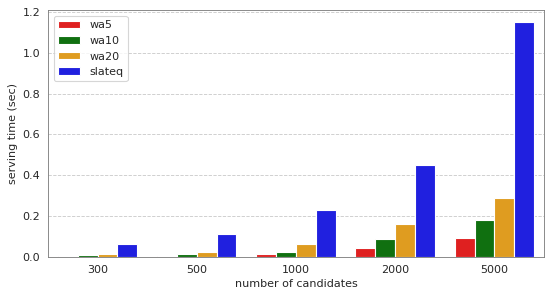

In [53]:
figure(figsize=(8, 4), dpi=80)
sns.barplot(data=res_df, x="num candidates", y="serving time", hue="alg", hue_order=["wa5", "wa10", "wa20", "slateq"], palette=["red", "green", "orange", "blue"])
plt.ylabel("serving time (sec)")
plt.xlabel("number of candidates")
plt.legend(title="")